## Libraries

In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
#from sklearn import preprocessing
from scipy.stats import mode
from collections import Counter

In [136]:
#Opening the file to read
data = pd.read_csv(r'C:\Users\sequi\CS235_Fall2023\diabetes_012_health_indicators_BRFSS2015.csv')
data.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,...,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,0.158742,0.434244,0.431654,0.963750,28.462385,0.445364,0.041390,0.093401,0.761698,0.636696,...,0.950430,0.081931,2.503735,3.160352,4.233822,0.166372,0.438154,8.091501,5.076981,6.104561
std,0.365437,0.495660,0.495309,0.186913,7.201643,0.497008,0.199192,0.290995,0.426047,0.480954,...,0.217057,0.274261,1.069779,7.338189,8.678973,0.372416,0.496163,3.042941,0.985014,2.060430
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [137]:
print(data.dtypes)

Diabetes_012            int64
HighBP                  int64
HighChol                int64
CholCheck               int64
BMI                     int64
Smoker                  int64
Stroke                  int64
HeartDiseaseorAttack    int64
PhysActivity            int64
Fruits                  int64
Veggies                 int64
HvyAlcoholConsump       int64
AnyHealthcare           int64
NoDocbcCost             int64
GenHlth                 int64
MentHlth                int64
PhysHlth                int64
DiffWalk                int64
Sex                     int64
Age                     int64
Education               int64
Income                  int64
dtype: object


This are the missing values:  Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


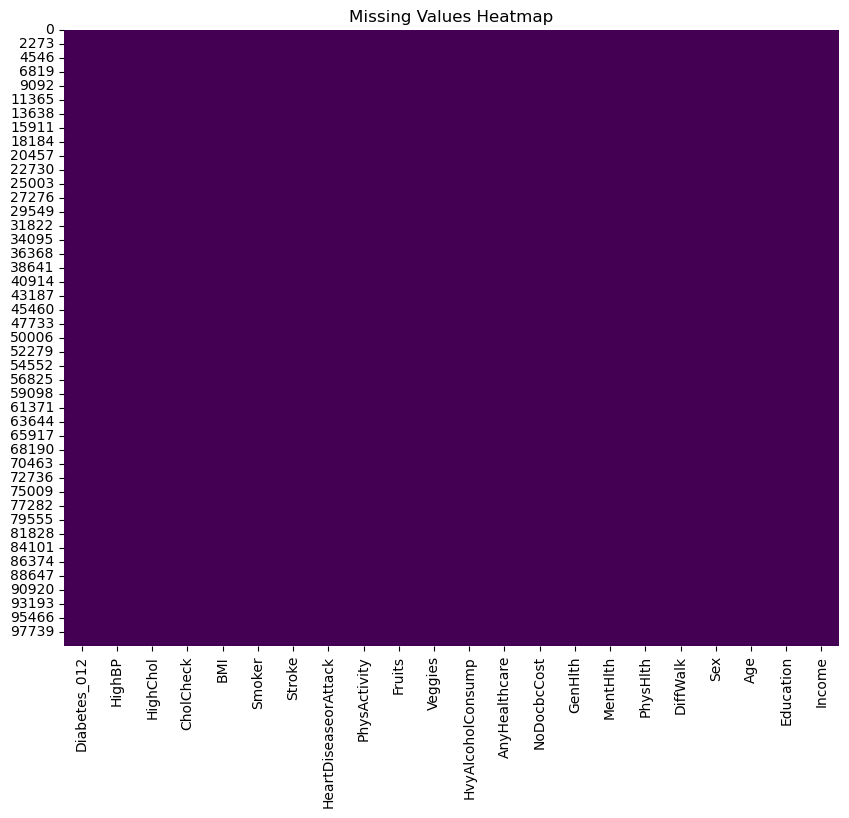

In [138]:
#Let's find any missing values
missing_values = data.isnull().sum()
print("This are the missing values: ", missing_values)

#how to plot the missing values in a heatmap
plt.figure(figsize=(10,8))
sns.heatmap(data.isnull(), cmap='viridis', cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

In [139]:
#Let's check for any duplicates
repeat = data[data.duplicated()]
print("This are the # of duplicates: ", len(repeat))

#Let's get rid of the duplicates
new_data=data.drop_duplicates()
new_data

This are the # of duplicates:  6085


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,0,0,1,1,28,0,0,0,1,1,...,1,0,2,0,3,0,1,9,6,8
99995,0,1,1,1,19,1,0,0,1,0,...,1,0,3,0,4,0,0,11,5,5
99996,0,1,1,1,25,1,0,1,1,1,...,1,0,2,0,10,1,0,13,4,5
99997,0,0,1,1,29,1,0,0,1,0,...,1,0,2,0,0,0,0,8,4,8


In [140]:
new_data.dtypes

Diabetes_012            int64
HighBP                  int64
HighChol                int64
CholCheck               int64
BMI                     int64
Smoker                  int64
Stroke                  int64
HeartDiseaseorAttack    int64
PhysActivity            int64
Fruits                  int64
Veggies                 int64
HvyAlcoholConsump       int64
AnyHealthcare           int64
NoDocbcCost             int64
GenHlth                 int64
MentHlth                int64
PhysHlth                int64
DiffWalk                int64
Sex                     int64
Age                     int64
Education               int64
Income                  int64
dtype: object

## Feature Engineering 

### Data Manipulation: Normalization and Scalization.

In [141]:
"""
new_ds = pd.DataFrame(new_data)
columns_to_normalize = ['BMI','GenHlth','MentHlth','PhysHlth','Age','Education','Income']

#data_to_normalize = new_ds[columns_to_normalize]

for column in columns_to_normalize:
    X_min = new_ds[column].min()
    X_max = new_ds[column].max()
    new_ds[column] = (new_ds[column] - X_min) / (X_max - X_min)

new_ds = new_ds.astype(np.int64)
#manually normalize the data using L2 normalization
#normalized_data = (data_to_normalize - data_to_normalize.min()) / (data_to_normalize.max() - data_to_normalize.min())

#combine the normalized data with the remaining columns
#scaled_ds = pd.concat([normalized_data, new_ds.drop(columns = columns_to_normalize)], axis =1)
#normalized_data = data_to_normalize.div(np.linalg.norm(data_to_normalize, axis=1), axis=0)

#combine the normalized data with the remaining columns
#scaled_ds = pd.concat([normalized_data, new_ds.drop(columns=columns_to_normalize)], axis=1)

#display the scaled dataset
print(new_ds.dtypes)
"""

"\nnew_ds = pd.DataFrame(new_data)\ncolumns_to_normalize = ['BMI','GenHlth','MentHlth','PhysHlth','Age','Education','Income']\n\n#data_to_normalize = new_ds[columns_to_normalize]\n\nfor column in columns_to_normalize:\n    X_min = new_ds[column].min()\n    X_max = new_ds[column].max()\n    new_ds[column] = (new_ds[column] - X_min) / (X_max - X_min)\n\nnew_ds = new_ds.astype(np.int64)\n#manually normalize the data using L2 normalization\n#normalized_data = (data_to_normalize - data_to_normalize.min()) / (data_to_normalize.max() - data_to_normalize.min())\n\n#combine the normalized data with the remaining columns\n#scaled_ds = pd.concat([normalized_data, new_ds.drop(columns = columns_to_normalize)], axis =1)\n#normalized_data = data_to_normalize.div(np.linalg.norm(data_to_normalize, axis=1), axis=0)\n\n#combine the normalized data with the remaining columns\n#scaled_ds = pd.concat([normalized_data, new_ds.drop(columns=columns_to_normalize)], axis=1)\n\n#display the scaled dataset\nprint(

## Pearson Correlation - Heat Map - Feature Correlation

<Axes: >

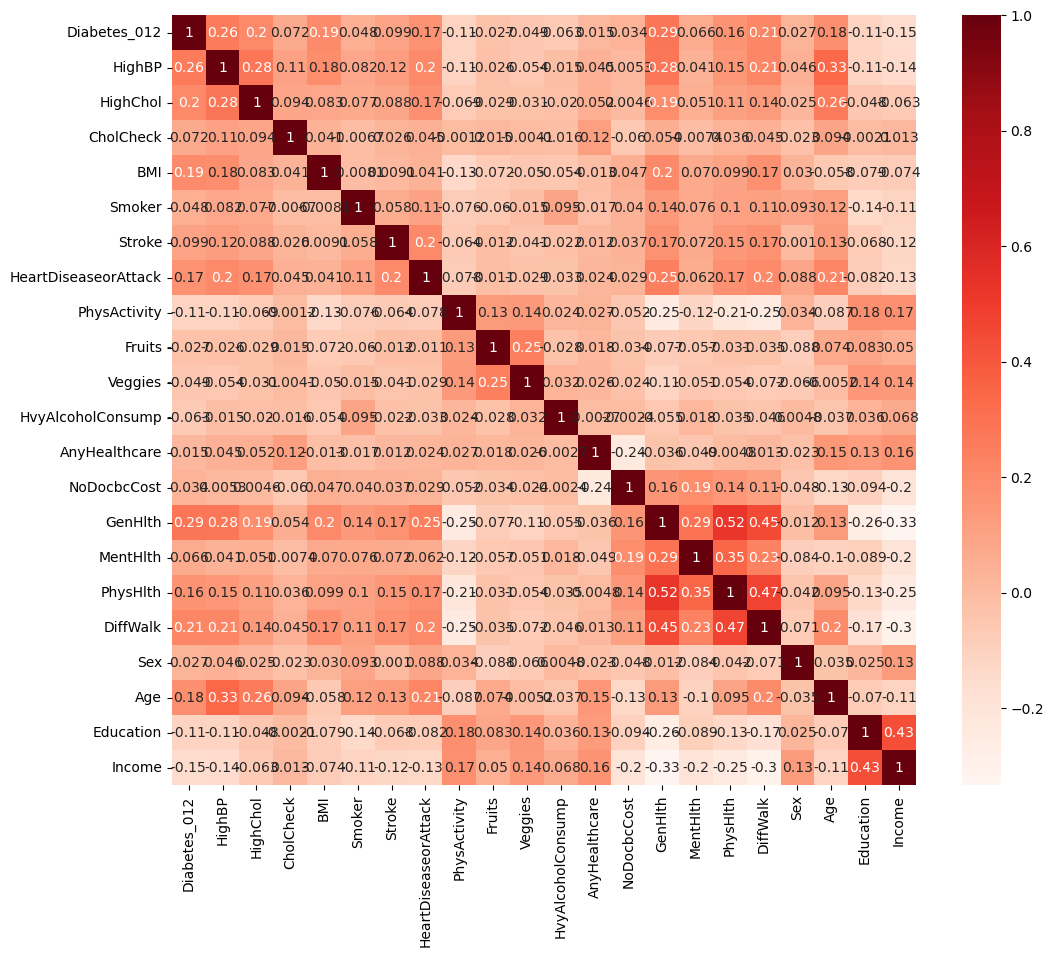

In [142]:
 #Using Pearson Correlation
plt.figure(figsize=(12,10))
cor= new_data.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.Reds)

In [143]:
#Correlation with output variable
cor_target = abs(cor['Diabetes_012'])

#Let's select the features with most correlation
relevant_features = cor_target[cor_target > 0.015]
relevant_features

#This code gives me more features*****

Diabetes_012            1.000000
HighBP                  0.262828
HighChol                0.204601
CholCheck               0.072108
BMI                     0.193924
Smoker                  0.047869
Stroke                  0.099413
HeartDiseaseorAttack    0.171518
PhysActivity            0.108283
Fruits                  0.027250
Veggies                 0.048815
HvyAlcoholConsump       0.062574
NoDocbcCost             0.034183
GenHlth                 0.285954
MentHlth                0.066101
PhysHlth                0.164085
DiffWalk                0.211411
Sex                     0.027076
Age                     0.177375
Education               0.114496
Income                  0.150782
Name: Diabetes_012, dtype: float64

In [144]:
#Let's remove irrelevant columns
columns_to_keep = ['Diabetes_012','HighBP','HighChol','BMI','Smoker','Stroke','HeartDiseaseorAttack','PhysActivity',
                   'Fruits','Veggies','HvyAlcoholConsump','AnyHealthcare','GenHlth','MentHlth','PhysHlth','DiffWalk',
                  'Sex','Age','Income']
cleaned_data = new_data[columns_to_keep]
print(cleaned_data.dtypes)

Diabetes_012            int64
HighBP                  int64
HighChol                int64
BMI                     int64
Smoker                  int64
Stroke                  int64
HeartDiseaseorAttack    int64
PhysActivity            int64
Fruits                  int64
Veggies                 int64
HvyAlcoholConsump       int64
AnyHealthcare           int64
GenHlth                 int64
MentHlth                int64
PhysHlth                int64
DiffWalk                int64
Sex                     int64
Age                     int64
Income                  int64
dtype: object


  ## Let's split the data

In [145]:
#Splitting the data
X = cleaned_data.drop('Diabetes_012', axis=1)  #dependent variables
y = cleaned_data['Diabetes_012']   #independent variable (feature matrix) | target variable

y

0        0
1        0
2        0
3        0
4        0
        ..
99994    0
99995    0
99996    0
99997    0
99998    0
Name: Diabetes_012, Length: 93914, dtype: int64

In [146]:
ratio = 0.75

total_rows = cleaned_data.shape[0]
train_size = int(total_rows*ratio)

print("This is the # of total rows: ", total_rows)
#split data into test and train
train = cleaned_data[0:train_size]
test = cleaned_data[train_size:]

#Print train set
print("Train dataset")
print(train)

This is the # of total rows:  93914
Train dataset
       Diabetes_012  HighBP  HighChol  BMI  Smoker  Stroke  \
0                 0       1         1   40       1       0   
1                 0       0         0   25       1       0   
2                 0       1         1   28       0       0   
3                 0       1         0   27       0       0   
4                 0       1         1   24       0       0   
...             ...     ...       ...  ...     ...     ...   
74255             0       0         0   27       1       0   
74256             0       0         1   28       1       0   
74257             0       0         0   29       1       0   
74259             0       0         0   25       0       0   
74260             0       0         1   30       0       0   

       HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  HvyAlcoholConsump  \
0                         0             0       0        1                  0   
1                         0             1  

In [147]:
print("Test dataset")
print(test)

Test dataset
       Diabetes_012  HighBP  HighChol  BMI  Smoker  Stroke  \
74261             0       1         0   24       1       1   
74262             0       0         0   24       1       0   
74264             0       0         0   20       0       0   
74265             0       0         0   27       0       0   
74267             0       0         0   26       1       0   
...             ...     ...       ...  ...     ...     ...   
99994             0       0         1   28       0       0   
99995             0       1         1   19       1       0   
99996             0       1         1   25       1       0   
99997             0       0         1   29       1       0   
99998             0       1         1   24       1       0   

       HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  HvyAlcoholConsump  \
74261                     0             1       1        1                  1   
74262                     0             1       1        1                  0   

In [148]:
train.shape, test.shape

((70435, 19), (23479, 19))

## Cross Validation (using Logistic Regression)

Cross-validation score: 0.8316579703971888


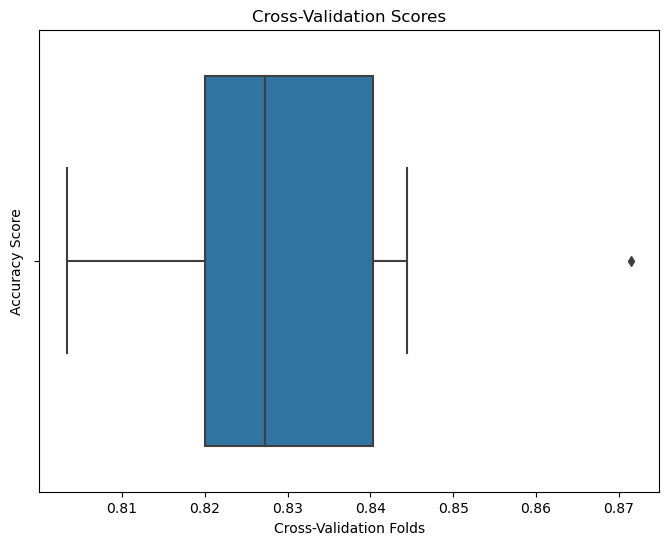

In [149]:
# Function to perform logistic regression
def logistic_regression(X, y, learning_rate=0.01, num_iterations=1000):
    X_with_intercept = np.c_[np.ones(X.shape[0]), X]  # Add a column of ones for the intercept
    theta = np.zeros(X_with_intercept.shape[1])

    for i in range(num_iterations):
        logits = np.dot(X_with_intercept, theta)
        predictions = 1 / (1 + np.exp(-logits))
        gradient = np.dot(X_with_intercept.T, (predictions - y)) / len(y)
        theta -= learning_rate * gradient

    return theta


# Function to predict labels using logistic regression
def predict_logistic_regression(X, theta):
    X_with_intercept = np.c_[np.ones(X.shape[0]), X]
    logits = np.dot(X_with_intercept, theta)
    predictions = 1 / (1 + np.exp(-logits))
    return predictions

# Function to calculate accuracy
def accuracy(y_true, y_pred):
    return np.mean(y_true == (y_pred >= 0.5).astype(int))

# Function to perform cross-validated scoring
def cross_val_score_logistic_regression(X, y, learning_rate=0.01, num_iterations=1000, cv=10):
    fold_size = len(X) // cv
    scores = []

    for i in range(cv):
        start = i * fold_size
        end = (i + 1) * fold_size

        # Split the data into training and testing sets
        test_indices = range(start, end)
        train_indices = list(set(range(len(X))) - set(test_indices))

        X_train, X_test = X[train_indices], X[test_indices]
        y_train, y_test = y[train_indices], y[test_indices]

        # Train the logistic regression model on the training data
        theta = logistic_regression(X_train, y_train, learning_rate, num_iterations)

        # Make predictions on the test data
        y_test_pred = predict_logistic_regression(X_test, theta)

        # Calculate accuracy and store it
        acc = accuracy(y_test, y_test_pred)
        scores.append(acc)

    return np.array(scores)

# Example usage
X_data = cleaned_data[['HighBP','HighChol','GenHlth','DiffWalk']].values
y_data= cleaned_data['Diabetes_012'].values

# Perform cross-validated scoring for logistic regression
#CV = to the # of folds
cv_scores = cross_val_score_logistic_regression(X_data, y_data, cv=10)

# Print the average accuracy
print("Cross-validation score:", np.mean(cv_scores))

# Plot the boxplot of cross-validation scores
plt.figure(figsize=(8, 6))
sns.boxplot(x=cv_scores)
plt.title("Cross-Validation Scores")
plt.xlabel("Cross-Validation Folds")
plt.ylabel("Accuracy Score")
plt.show()

In [150]:
X_data.dtype

dtype('int64')

## Let's split our data

In [151]:
def train_split_function(data, test_size=0.2, random_seed=None):
    if random_seed is not None:
        np.random.seed(random_seed)
        
    #suffle the indices
    indices = np.arange(len(data))
    np.random.shuffle(indices)
    
    #calculate the number of samples for the test set
    test_size = int(len(data)*test_size)
    
    #split the inidices into training and testing sets
    test_indices = indices[:test_size]
    train_indices = indices[test_size:]
    
    #split the data using the indices
    train_data = data.iloc[train_indices]
    test_data = data.iloc[test_indices]
    
    #separate features (X) and target variable (y) for training and test sets
    X_train = train_data.drop('Diabetes_012', axis=1).values.astype(np.int64)
    y_train = train_data['Diabetes_012'].values.astype(np.int64)
    
    X_test = test_data.drop('Diabetes_012', axis=1).values.astype(np.int64)
    y_test = test_data['Diabetes_012'].values.astype(np.int64)
    
    return X_train, y_train, X_test, y_test

X_train, y_train, X_test, y_test = train_split_function(cleaned_data, test_size=0.20, random_seed=42)

#print the results
print("Training set shape(X): ", X_train.shape)
print("Training set shape(y) ", y_train.shape)
print("Testing set shape(X)", X_test.shape)
print("Testing set shape(y)", y_test.shape)

Training set shape(X):  (75132, 18)
Training set shape(y)  (75132,)
Testing set shape(X) (18782, 18)
Testing set shape(y) (18782,)


In [152]:
#This represents that there is variety in my target variable splits
print("Unique values in y_train:", np.unique(y_train))
print("Unique values in y_test:", np.unique(y_test))
print("Unique values in X_test:", np.unique(X_test))
print("Unique values in X_train:", np.unique(X_train))

Unique values in y_train: [0 1]
Unique values in y_test: [0 1]
Unique values in X_test: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 69 70 71 73
 74 75 77 79 81 82 83 84 86 87 88 89 92 95 98]
Unique values in X_train: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 79 81 82 84 85 87 89 91 92 95 96 98]


In [153]:
X_test

array([[ 1,  0, 19, ...,  0, 10,  6],
       [ 0,  0, 39, ...,  0,  6,  8],
       [ 1,  1, 29, ...,  1, 12,  4],
       ...,
       [ 1,  1, 36, ...,  1, 11,  8],
       [ 1,  1, 38, ...,  1,  7,  8],
       [ 0,  0, 28, ...,  0,  9,  8]], dtype=int64)

In [154]:
print("The datatype for X_train is: ", X_train.dtype)
print("The datatype for X_test is: ", X_test.dtype)
print("The datatype for y_train is: ", y_train.dtype)
print("The datatype for y_test is: ", y_test.dtype)
print("The datatype for X_data is: ", X_data.dtype)
print("The datatype for y_data is: ", y_data.dtype)

The datatype for X_train is:  int64
The datatype for X_test is:  int64
The datatype for y_train is:  int64
The datatype for y_test is:  int64
The datatype for X_data is:  int64
The datatype for y_data is:  int64


## Random Forest Model

In [155]:
#Decision Tree

class Node:      #this is a leaf node
    def __init__(self, feature=None, threshold=None, left=None, right=None,*,value=None):
        self.feature = feature     #which feature was divided with
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value  #since this is a leaf node, then there's no value
        
    def is_leaf_node(self):     #this identifies if a specific leaf is a leaf node or not
        return self.value is not None  #if the value exists it means it's leaf node 
        
        
class DecisionTree:
    def __init__(self, min_samples_split=2, max_depth=100, n_features=None): #make sure the # of features do not exceed the # of features that we have
        self.min_samples_split=min_samples_split
        self.max_depth=max_depth
        self.n_features=n_features   #something that we are going to get from whoever is defining this tree
                                 #it is a way to find some randomness
        self.root=None
        
    def fit(self, X, y):
        #need to divide the function
        self.n_features= X.shape[1] if not self.n_features else min(X.shape[1], self.n_features)  #this is to make sure we don't get an error here
        self.root = self._grow_tree(X, y)
        
    def _grow_tree(self,X,y, depth=0):
        n_samples, n_feats = X.shape
        n_labels = len(np.unique(y)) # get the unique values of y and we call them n_labels, len would be the # of labels
        
        #check the stopping criteria
        if depth>=self.max_depth or n_labels==1 or n_samples<self.min_samples_split:
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)
        
        feat_idxs = np.random.choice(n_feats, self.n_features, replace = False)
        
        #find the best split   --- this creates the randomness in the desicion tree
        best_feature,best_thresh = self._best_split(X,y, feat_idxs)
        
        
        #create child nodes
        left_idxs, right_idxs = self._split(X[:,best_feature], best_thresh)
        left = self._grow_tree(X[left_idxs, :], y[left_idxs], depth+1)
        right = self._grow_tree(X[right_idxs, :], y[right_idxs], depth+1)
        
        return Node(best_feature, best_thresh, left, right)
        
          #this creates the helper function that selects the best split
    def _best_split(self,X,y,feat_idxs):   #it finds the threshold among all possible thresholds that are out there and selects the best one
        best_gain = 1
        split_idx, split_threshold = None, None
        
        for feat_idx in feat_idxs:
            X_column = X[:, feat_idx]
            thresholds = np.unique(X_column)
            
            for thr in thresholds: 
                #calculate the information gain
                #gain = self.information_gain(self,X,y,thr)
                gain = self.information_gain(y, X_column,thr)
                
                if gain > best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_threshold = thr
        
        return split_idx, split_threshold
    
    #def _information_gain(self,X,y,threshold):
    def _information_gain(self, y, X_column, threshold):
        # Parent entropy
        parent_entropy = self._entropy(y)
        
        # create children
        left_idxs, right_idxs = self._split(X_column, threshold)
        
        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0
        # calculate the weighted entropy of children
        n = len(y)
        n_l,n_r = len(left_idxs), len(right_idxs)
        e_l, e_r = self._entropy(y[left_idxs]), self._entropy(y[right_idxs])
        child_entropy = (n_l/n)*e_l+(n_r/n)*e_r
        
        #calculate the IG
        information_gain = parent_entropy - child_entropy
        return information_gain
        
    def _split(self,X_column, split_thresh):
        left_idxs = np.argwhere(X_column<=split_thresh).flatten()
        right_idxs = np.argwhere(X_column > split_threshold).flatten()
        return left_idxs, right_idxs
    
    def _entropy(self, y):
        hist = np.bincount(y)
        ps = hist/len(y)
        
        return -np.sum([p*np.log(p) for p in ps if p>0])
    
    
    def _most_common_label(self, y):   #generates the tree value
        counter = Counter(y)
        value = counter.most_common(1)[0][0]
        return value
    
    def predict(self,X):
        return np.array([self._traverse_tree(x, self.root) for x in X])
                        
    def _traverse_tree(self, x, node):
        if node.is_leaf_node():
            return node.value
                        
        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)

In [156]:
#Random Forest

class RandomForest:
    def __init__(self,n_trees = 10, max_depth = 10, min_samples_split = 2, n_features=None):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.n_features = n_features 
        self.trees = []
    
    def fit(self, X, y):
        self.trees = []
        for _ in range(self.n_trees):
            tree = DecisionTree(max_depth=self.max_depth,
                        min_samples_split=self.min_samples_split,
                        n_features=self.n_features)
            X_sample, y_sample = self._bootstrap_samples(X,y)
            tree.fit(X_sample,y_sample)
            self.trees.append(tree)
            
    def _bootstrap_samples(self,X,y):
        n_samples = X.shape[0]
        idxs = np.random.choice(n_samples, n_samples, replace = True)
        return x[idxs], y[idxs]
    
    def _most_common_label(self, y):
        counter = Counter(y)
        most_common = counter.most_common(1)[0][0]
        return most_common
    
    def predict(self, X):
        predictions = np.array([tree.predict(X) for tree in self.trees])
        tree_preds = np.swapaxes(predictions, 0, 1)
        predictions = np.array([self._most_common_label(pred) for pred in tree_preds])
        return predictions

In [157]:
def accuracy(y_test, y_pred):
    accuracy = np.sum(y_test == y_pred) / len(y_test)
    return accuracy

classif = RandomForest(n_trees=20)
classif.fit = (X_train, y_train)
predictions = classif.predict(X_test)
print(predictions)
acc = accuracy(y_test, predictions)
print("The accuracy is: ", acc)

AxisError: axis2: axis 1 is out of bounds for array of dimension 1

In [121]:
#print("Unique values in y_test:", np.unique(y_test))
print("Unique values in X_test:", np.unique(X_test))
print("Unique values in y_pred:", np.unique(y_pred))
np.unique(y_pred)
#y_pred

Unique values in X_test: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 69 70 71 73
 74 75 77 79 81 82 83 84 86 87 88 89 92 95 98]


NameError: name 'y_pred' is not defined

## Random Forest Model - Accuracy

In [120]:
def precision_recall_f1(y_test, y_pred):
    true_positive = np.sum((y_test == 1) & (y_pred == 1))
    false_positive = np.sum((y_test == 0) & (y_pred == 1))
    false_negative = np.sum((y_test == 1) & (y_pred == 0))

    precision = true_positive / (true_positive + false_positive) if (true_positive + false_positive) != 0 else 0
    recall = true_positive / (true_positive + false_negative) if (true_positive + false_negative) != 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

    return precision, recall, f1

def confusion_matrix(y_test, y_pred):
    return np.array([[np.sum((y_test == 1) & (y_pred == 1)), np.sum((y_test == 1) & (y_pred == 0))],
                     [np.sum((y_test == 0) & (y_pred == 1)), np.sum((y_test == 0) & (y_pred == 0))]])

try: 
    prec, rec, f1 = precision_recall_f1(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    print("Precision:", prec)
    print("Recall:", rec)
    print("F1 Score:", f1)
    print("Confusion Matrix:\n", conf_matrix)

except ValueError as e:
    print(e)

NameError: name 'y_pred' is not defined

In [122]:
print(y_pred.shape)
print(y_test.shape)

NameError: name 'y_pred' is not defined

## Let's play with a Support Vector Machine

In [124]:
class SupportVectorMachine:
    def __init__(self, learning_rate=0.01, num_iterations=1000, C=1.0):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.C = C
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        # Convert labels to -1 and 1
        y = np.where(y == 0, -1, 1)

        # Initialize weights and bias
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)
        self.bias = 0

        # Training using gradient descent
        for _ in range(self.num_iterations):
            # Compute hinge loss and gradients
            loss = 1 - y * (np.dot(X, self.weights) + self.bias)
            loss[loss < 0] = 0  # Clip negative values to 0
            loss_term = self.C * np.sum(loss)
            gradient_weights = -2 * self.C * np.dot(loss, X)
            gradient_bias = -2 * self.C * np.sum(loss)

            # Update weights and bias
            self.weights -= self.learning_rate * gradient_weights
            self.bias -= self.learning_rate * gradient_bias

    def predict(self, X):
        return np.sign(np.dot(X, self.weights) + self.bias)

# Create and train the SVM model
svm_model = SupportVectorMachine(learning_rate=0.01, num_iterations=1000, C=1.0)
svm_model.fit(X_train, y_train)

# Predict the response for the test dataset
y_pred_class = svm_model.predict(X_test)

# Evaluate the model with SVM
accuracy = np.mean(y_pred_class == y_test)
print("SVM Accuracy: ", accuracy)

# Calculate and print confusion matrix
confusion = confusion_matrix(y_test, y_pred_class)
print("\nConfusion Matrix: \n", confusion)


C:\Users\sequi\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\sequi\AppData\Local\Temp\ipykernel_12440\1949257325.py:24: RuntimeWarning: overflow encountered in multiply
  gradient_weights = -2 * self.C * np.dot(loss, X)


SVM Accuracy:  0.0

Confusion Matrix: 
 [[0 0]
 [0 0]]


## Let's play with Hyper Tuning the Model

In [381]:
class RandomForestClassifier:
    def __init__(self, n_estimators=100, max_depth=None, max_leaf_nodes=None, max_features=None):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.max_leaf_nodes = max_leaf_nodes
        self.max_features = max_features

    def fit(self, X, y):
        # Your implementation for training the random forest
        self.tree = self._build_tree(X, y, depth=0)
        return self.tree

    def predict(self, X):
        # Your implementation for making predictions
        return self._predict_tree(self.tree, X)

def random_search(X_train, y_train, param_dist, n_iter=5, cv=5):
    best_estimator = None
    best_score = float('-inf')

    for _ in range(n_iter):
        # Sample hyperparameters from the provided distributions
        params = {
            'n_estimators': np.random.randint(param_dist['n_estimators'][0], param_dist['n_estimators'][1] + 1),
            'max_depth': np.random.randint(param_dist['max_depth'][0], param_dist['max_depth'][1] + 1),
            'max_leaf_nodes': param_dist['max_leaf_nodes'],
            'max_features': np.random.choice(param_dist['max_features'])
        }

        # Create and train the random forest classifier
        rf = RandomForestClassifier(**params)
        rf.fit(X_train, y_train)

        # Evaluate the model (you need to implement this method in your RandomForestClassifier)
        score = rf.evaluate(X_train, y_train)  # Replace with your actual evaluation method

        # Update the best estimator if the current model has a higher score
        if score > best_score:
            best_estimator = rf
            best_score = score

    return best_estimator

# Define the hyperparameter search space
param_dist = {
    'n_estimators': [50, 500],
    'max_depth': [1, 10],
    'max_leaf_nodes': [None],
    'max_features': ["sqrt", "log2", None]
}

# Perform random search
best_estimator = random_search(X_train, y_train, param_dist, n_iter=5, cv=5)

# Print the best hyperparameters
print("Best Hyperparameters:")
print("n_estimators:", best_estimator.n_estimators)
print("max_depth:", best_estimator.max_depth)
print("max_leaf_nodes:", best_estimator.max_leaf_nodes)
print("max_features:", best_estimator.max_features)


AttributeError: 'RandomForestClassifier' object has no attribute '_build_tree'